In [1]:
# Importa bibliotecas necessárias.
import numpy as np
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Usamos a classe SGDRegressor do módulo Linear da biblioteca sklearn.
from sklearn.linear_model import SGDRegressor

# Função mágica para figuras interativas.
%matplotlib notebook

### SGDRegressor

+ A classe SGDRegressor, da biblioteca Scikit-Learn, implementa o gradiente descendente estocástico.
+ Possui vários hiperparâmetros que podem ser configurados: tipo de função de erro, esquema de variação do passo de aprendizagem, penalização, critério de padasa, etc.
+ A função de erro pode ser configurada entre várias opções, mas por padrão, a classe usa o erro quadrático médio.
+ É possível definir o esquema de variação do passo de aprendizagem como constante, redução programada ou adaptativo.
    * Por padrão, o esquema de variação é o da escala inversa, `invscaling`.
+ Não é possível implementar as versões do gradiente descendente em batelada e mini-batch.

**Documentação da classe**:

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html

In [2]:
seed = 42
np.random.seed(seed)
random.seed(seed)

### Gerando a função observável.

In [3]:
# Número de exemplos
N = 1000

# Atributos.
x1 = np.random.randn(N, 1)
x2 = np.random.randn(N, 1)

# Ruído.
w = np.random.randn(N, 1)

# Modelo gerador.
y = 2*x1 + 4*x2

# Função observável.
y_noisy = y + w

### Comparando a função observável com a objetivo.

<IPython.core.display.Javascript object>


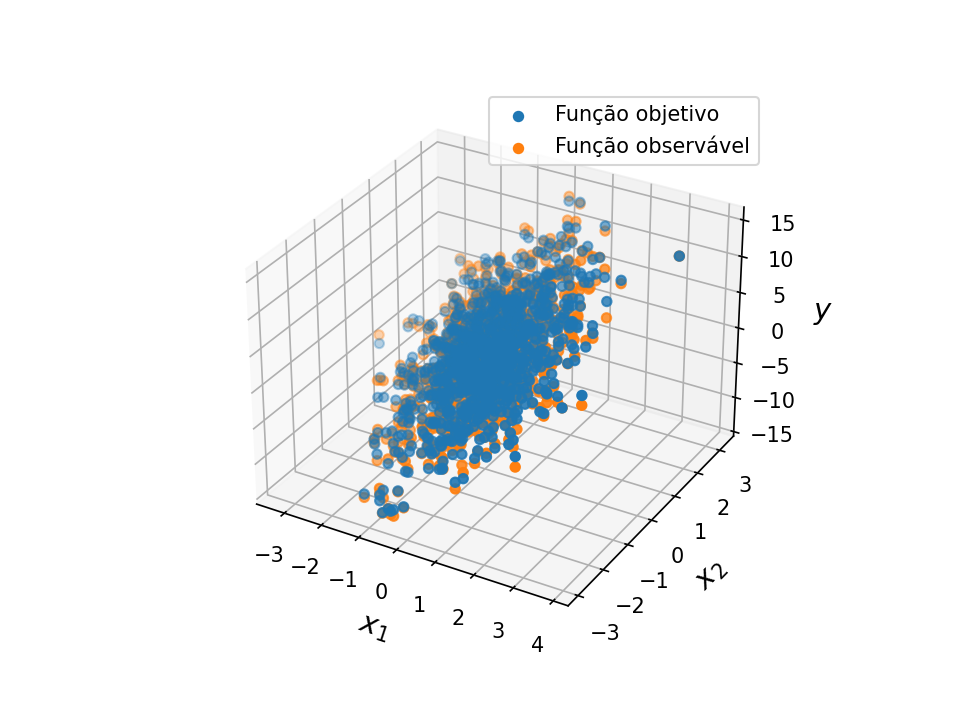

In [4]:
# Plot cost-function surface.
fig = plt.figure()
plt.subplot(projection='3d')
ax = fig.gca()

ax.scatter(x1, x2, y, label='Função objetivo')
ax.scatter(x1, x2, y_noisy, label='Função observável')
ax.set_xlabel('$x_1$', fontsize=14)
ax.set_ylabel('$x_2$', fontsize=14)
ax.set_zlabel('$y$', fontsize=14)
plt.legend()
plt.show()

### Gradiente descendente estocástico com Scikit-Learn.

**Observações**:

+ Como não temos o peso de bias na função objetivo, a função hipótese também não o terá, por isso fazemos `fit_intercept=False`.

In [5]:
# Concatena os vetores coluna x1 e x2.
X = np.c_[x1, x2]

# Instancia a classe SGDRegressor.
reg = SGDRegressor(fit_intercept=False)

# Treina o modelo.
reg.fit(X, y.ravel())

# Faz predição com o modelo treinado.
y_pred = reg.predict(X)

# Imprime o número de iterações até que o critério de parada seja atingido.
print('Number of iterations:', reg.n_iter_)

Number of iterations: 9


### Cálculo do MSE.

In [6]:
Jgde = (1.0/N)*np.sum(np.square(y_noisy - y_pred.reshape(N,1)))

print('MSE:', Jgde)

MSE: 0.9662509336822807


### Pesos encontrados.

In [7]:
# Imprime valores encontrados pelo GDE.
print('a1: %1.4f' % (reg.coef_[0]))
print('a2: %1.4f' % (reg.coef_[1]))

a1: 1.9997
a2: 3.9996
